In [1]:
# Setup environment
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

In [2]:
# Read test data file
data_filename = '../data/test_data.csv'
data = pd.read_csv(data_filename)

In [3]:
# Function to compute evaluation metrics for the models and create a scatterplot of the test and predicted y values
def computeEvalMetrics(rg, X_test, y_test, y_predicted, plot_name):
    metrics = {}
    metrics['mse'] = mean_squared_error(y_predicted, y_test)
    metrics['rmse'] = np.sqrt(metrics['mse'])
    metrics['score'] = rg.score(X_test, y_test)
    
    # This plot is also saved for use in the report
    fig, ax = plt.subplots(figsize=(8,8))
    ax.grid(True)
    ax.set_title(plot_name)
    ax.set_ylabel('Predicted')
    ax.set_xlabel('Actual')
    plt.scatter(y_test, y_predicted, alpha=0.2)
    plt.savefig('plots/' + plot_name + '.png')
    
    return metrics

In [4]:
# Function to create and test 4 different regression models
# Using sklearn modules, LinearRegression, GradientBoostingRegressor, RandomForestRegressor, and a combination of these in a VotingRegressor are all used.
# After creating the models, they are evaluated and diagnostic plots are created.
# Results of the evaluation are returned to allow multiple experiments involving data wrangling.
def createAndTestModels(df, experiment_name):
    # Create random test and train subsets using 20% of the original data and a random state of 1 for reproducibility
    # Uses the sklearn method for creating subsets.
    y = df['y']
    X = df[list(df.columns)[1:]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    # Create LinearRegression Model
    print('LinearRegresssion Model:')
    start = time.process_time()
    reg_lin = LinearRegression()
    reg_lin.fit(X_train, y_train)
    y_predicted = reg_lin.predict(X_test)
    elapsed_time = time.process_time() - start
    reg_lin_metrics = computeEvalMetrics(reg_lin, X_test, y_test, y_predicted, experiment_name + '_LinearRegression')
    print(reg_lin_metrics)
    print('Elapsed Time: ', elapsed_time, 'sec')
    
    # Create GradientBoostingRegressor Model
    print('\nGradientBoostingRegressor Model:')
    start = time.process_time()
    reg_gb = GradientBoostingRegressor(random_state = 1)
    reg_gb.fit(X_train, y_train)
    y_predicted = reg_gb.predict(X_test)
    elapsed_time = time.process_time() - start
    reg_gb_metrics = computeEvalMetrics(reg_gb, X_test, y_test, y_predicted, experiment_name + '_GradientBoostingRegressor')
    print(reg_gb_metrics)
    print('Elapsed Time: ', elapsed_time, 'sec')

    # Create RandomForestRegressor Model
    print('\nRandomForestRegressor Model:')
    start = time.process_time()
    reg_rf = RandomForestRegressor(random_state=1)
    reg_rf.fit(X_train, y_train)
    y_predicted = reg_rf.predict(X_test)
    elapsed_time = time.process_time() - start
    reg_rf_metrics = computeEvalMetrics(reg_rf, X_test, y_test, y_predicted, experiment_name + '_RandomForestRegressor')
    print(reg_rf_metrics)
    print('Elapsed Time: ', elapsed_time, 'sec')
    
    # Create VotingRegressor Model
    print('\nVotingRegressor Model:')
    start = time.process_time()
    reg_vote = VotingRegressor([('gb', reg_gb), ('rf', reg_rf), ('lr', reg_lin)])
    reg_vote.fit(X_train, y_train)
    y_predicted = reg_vote.predict(X_test)
    elapsed_time = time.process_time() - start
    reg_vote_metrics = computeEvalMetrics(reg_vote, X_test, y_test, y_predicted, experiment_name + '_VotingRegressor_gb_rf_lin')
    print(reg_vote_metrics)
    print('Elapsed Time: ', elapsed_time, 'sec')

LinearRegresssion Model:
{'mse': 0.005178683133363911, 'rmse': 0.07196306784291447, 'score': 0.986744645255662}
Elapsed Time:  0.0370919999999999 sec

GradientBoostingRegressor Model:
{'mse': 0.0016163843767168335, 'rmse': 0.04020428306433076, 'score': 0.995862703362067}
Elapsed Time:  4.268554 sec

RandomForestRegressor Model:
{'mse': 0.0016366197969411374, 'rmse': 0.04045515785337066, 'score': 0.995810908790635}
Elapsed Time:  7.970775000000001 sec

VotingRegressor Model:
{'mse': 0.0018162268817500538, 'rmse': 0.04261721344421822, 'score': 0.9953511865866639}
Elapsed Time:  12.377035000000001 sec


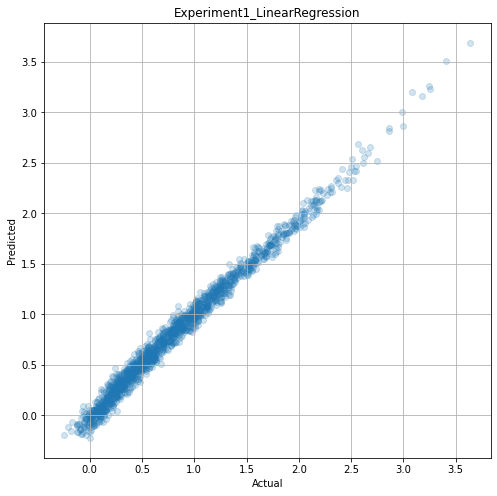

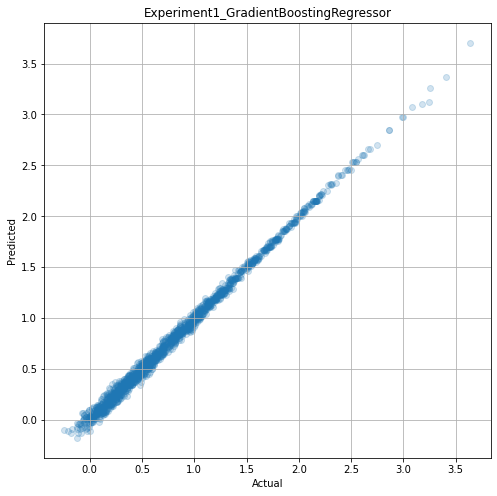

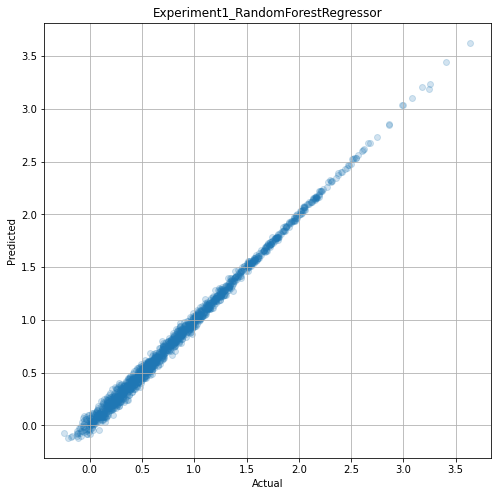

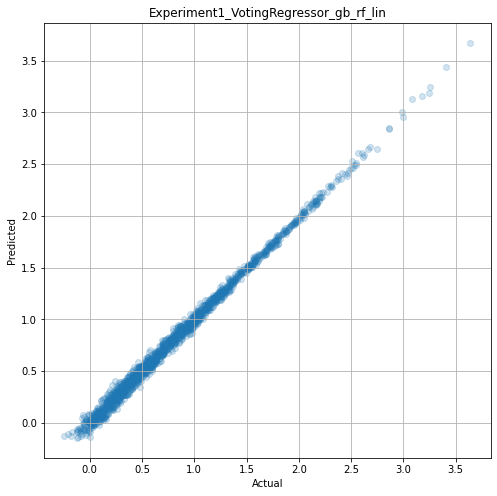

In [5]:
# Experiment 1: Here I simply drop the rows with null values and create the 4 models for evaluation
data_clean_dropna = data.dropna()
createAndTestModels(data_clean_dropna, 'Experiment1')

LinearRegresssion Model:
{'mse': 0.009469985326129424, 'rmse': 0.09731384961108785, 'score': 0.9900760447769759}
Elapsed Time:  0.025173999999999808 sec

GradientBoostingRegressor Model:
{'mse': 0.0033113584165896004, 'rmse': 0.0575444038685744, 'score': 0.9965299024737717}
Elapsed Time:  9.605342 sec

RandomForestRegressor Model:
{'mse': 0.0031662815095484615, 'rmse': 0.056269721072246856, 'score': 0.9966819340429652}
Elapsed Time:  19.52709 sec

VotingRegressor Model:
{'mse': 0.0037031369083713656, 'rmse': 0.0608534050680105, 'score': 0.9961193429981348}
Elapsed Time:  27.463078999999993 sec


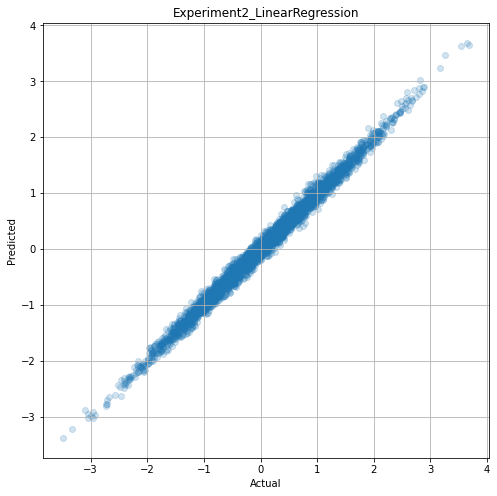

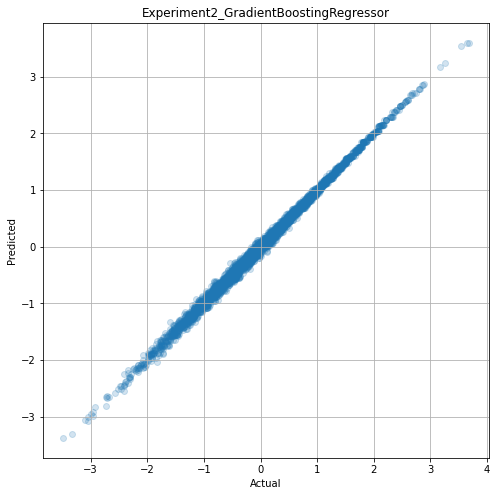

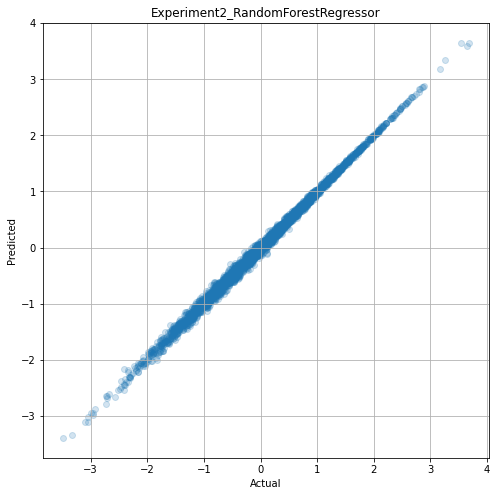

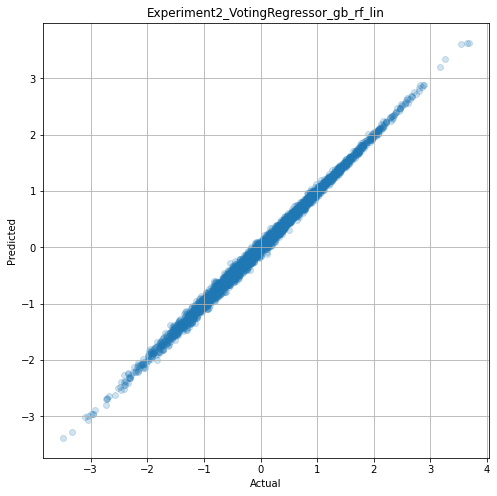

In [6]:
# Experiment 2: Here I experiment with replacing the null values with the respective column mean
# I am wondering here if I build more accurate models by including some of the rows with null values.
# Dropping the null values reduces the data by over half.
data_clean_mean = data.fillna(data.mean())
createAndTestModels(data_clean_mean, 'Experiment2')

LinearRegresssion Model:
{'mse': 0.006170718488858544, 'rmse': 0.07855392090060524, 'score': 0.984557859136409}
Elapsed Time:  0.01162100000000521 sec

GradientBoostingRegressor Model:
{'mse': 0.0017908330603854114, 'rmse': 0.042318235553782384, 'score': 0.9955184641089075}
Elapsed Time:  1.4064799999999877 sec

RandomForestRegressor Model:
{'mse': 0.0018537402362450214, 'rmse': 0.0430550837444897, 'score': 0.9953610397388429}
Elapsed Time:  2.019801000000001 sec

VotingRegressor Model:
{'mse': 0.0021646753496162283, 'rmse': 0.046526071719157944, 'score': 0.9945829287573124}
Elapsed Time:  3.0539849999999973 sec


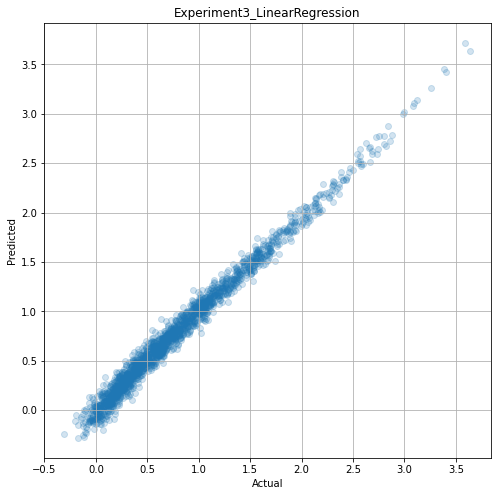

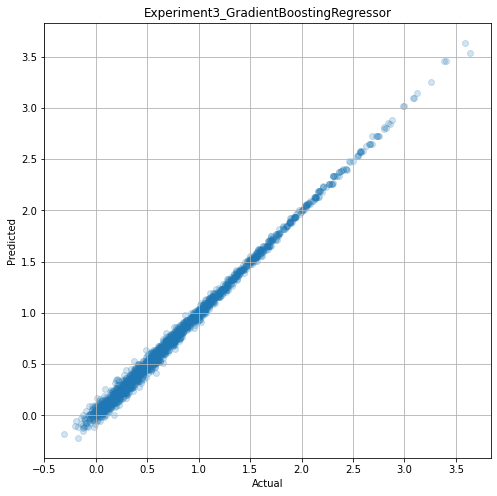

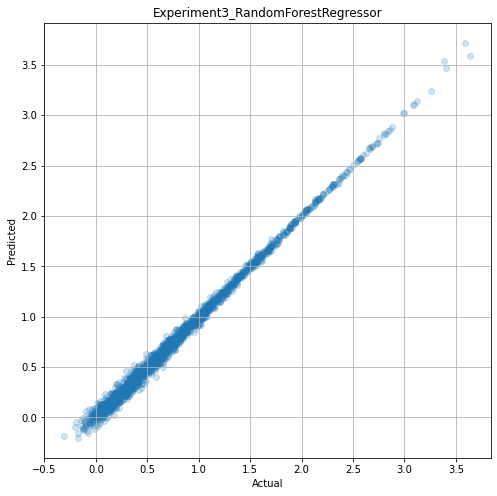

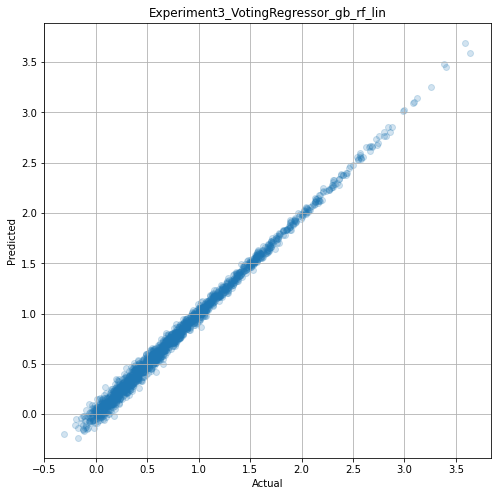

In [7]:
# Experiment 3: Here I experiment with dropping several columns that appear to have a very weak correlation with the 'y' column.
# These all have correlation coefficients over .6, some being as high as .9.
# I also drop rows with null values here.
# Model performance is not improved, but it does use less data and is faster to train.
data_subset = data[['y','x10','x11','x12','x15','x16']].dropna()
createAndTestModels(data_subset, 'Experiment3')

LinearRegresssion Model:
{'mse': 0.006203610957175111, 'rmse': 0.07876300500346028, 'score': 0.9844755461723655}
Elapsed Time:  0.01301499999999578 sec

GradientBoostingRegressor Model:
{'mse': 0.0017973085250857258, 'rmse': 0.04239467566907106, 'score': 0.995502259344707}
Elapsed Time:  1.1685000000000088 sec

RandomForestRegressor Model:
{'mse': 0.001866756446548747, 'rmse': 0.04320597697713532, 'score': 0.9953284668458511}
Elapsed Time:  1.638068000000004 sec

VotingRegressor Model:
{'mse': 0.0021789264852708017, 'rmse': 0.04667897262441411, 'score': 0.9945472654800713}
Elapsed Time:  2.5151889999999923 sec


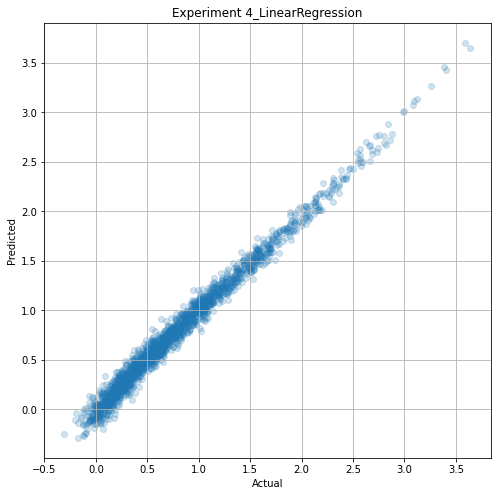

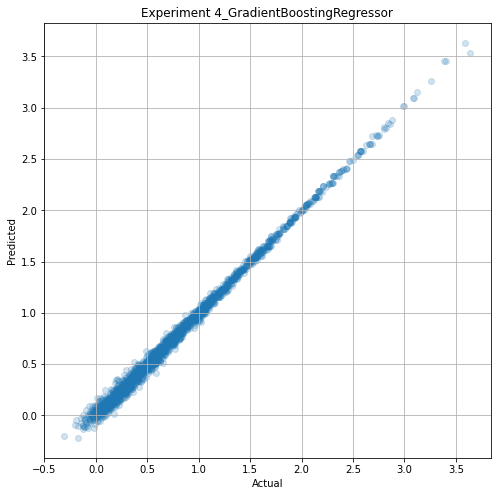

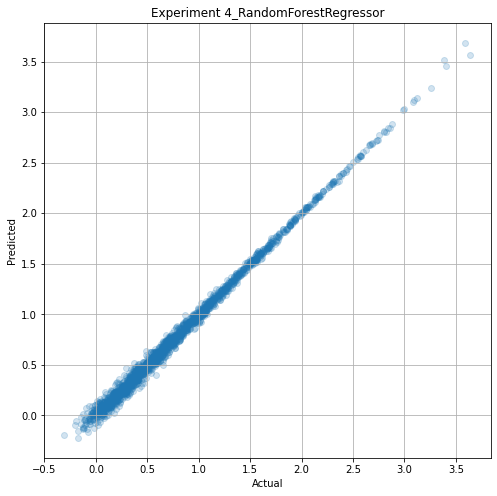

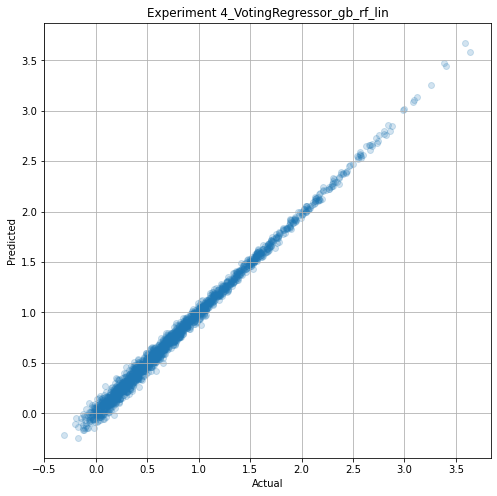

In [8]:
# Experiment 4: Here I experiment with a smaller sample of columns like in Experiment 3.
# With more time, a stepwise regression or more advanced combinations of learning models could be created to achieve more accuracy.
# In general, the subset of columns below is not much better than that of Experiment 3.
data_subset = data[['y','x10','x12','x15','x16']].dropna()
createAndTestModels(data_subset, 'Experiment 4')